# Experimenting with additional models

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Memuat himpunan dan data training
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv'
bike_data = pd.read_csv(url)
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

# Memisahkan fitur dan label
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Memisahkan data 70%-30% menjadi set pelatihan dan uji test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


#### Another Liner Algorithm 

Lasso() 

MSE: 201155.70593338402
RMSE: 448.5038527519959
R2: 0.605646863782449


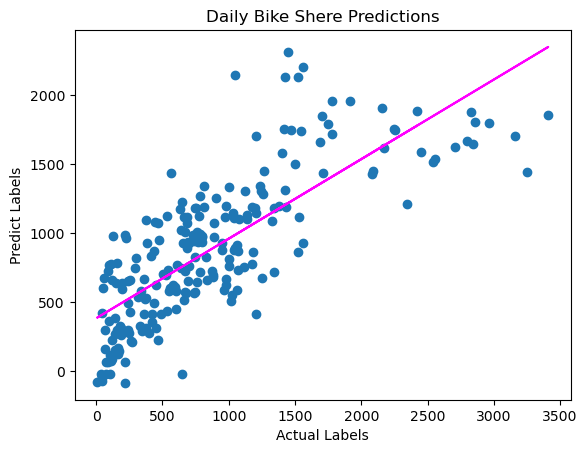

In [29]:
from sklearn.linear_model import Lasso

# Menyesuaikan model lasso pada set pelatihan
model = Lasso().fit(X_train, y_train)
print(model, '\n')

# Evaluasi model menggunakan data pengujian
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

# Plot prediksi vs Aktual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predict Labels')
plt.title('Daily Bike Shere Predictions')

# Overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Decision Tree Algorithm

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Melatih model
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model, '\n')

# Memvisualisasikan model
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_6 <= 0.29
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_6 >  0.29
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_8 <= 0.37
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_8 >  0.37
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_9 <= 0.36
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_9 >  0.36
|   |   |   |   |   |   |   |--- val

MSE: 260953.2409090909
RMSE: 510.8358257885707
R2: 0.48841754957369343


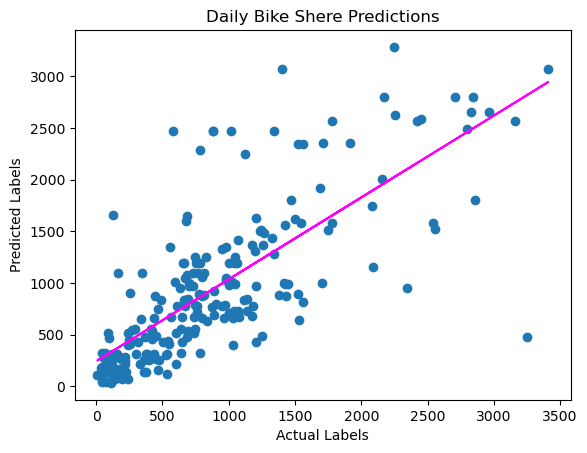

In [34]:
# Evaluasi model menggunakan data pengujian
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

# Plot diprediksi vs aktual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Shere Predictions')

# Overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

#### Ensamble Algorithm

RandomForestRegressor() 

MSE: 110033.84814227275
RMSE: 331.71350310512344
R2: 0.7842855468422008


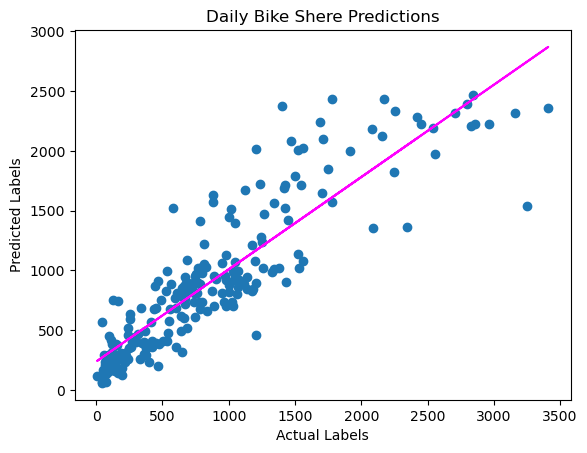

In [39]:
from sklearn.ensemble import RandomForestRegressor


# Melatih model
model = RandomForestRegressor().fit(X_train, y_train)
print(model, '\n')

# Mengeva;uasi model menggunakan data pengujian
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

# Plot diprediksi vs aktual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Shere Predictions')

# Overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 103706.97153552146
RMSE: 322.0356681107257
R2: 0.7966889913319141


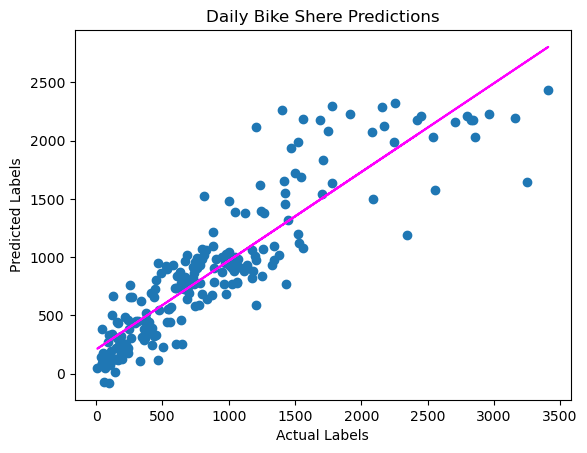

In [41]:
from sklearn.ensemble import GradientBoostingRegressor


# Melatih model
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, '\n')

# Mengeva;uasi model menggunakan data pengujian
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

# Plot diprediksi vs aktual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Shere Predictions')

# Overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

### Summary

'Here we've tried a number of new regression algorithms to improve performance. In our notebook we'll look at 'tuning' these algorithms to improve performance.